In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

In [2]:
df = pd.read_csv('Heart.csv') #Used to read comma seperated value file and store it in pandas dataframe
df.replace('?',-99999,inplace = True) #replacing missing values denoted by '?' with -99999 in df variable itself
#df.drop(['age'],axis=1,inplace=True) #removing the column (axis = 1 means column) 'id' as it is not needed for processing
full_data = df.astype(float).values.tolist() #Converting dataframe into a normal list for further processing
full_data

[[63.0, 1.0, 3.0, 145.0, 233.0, 1.0, 0.0, 150.0, 0.0, 2.3, 0.0, 0.0, 1.0, 1.0],
 [37.0, 1.0, 2.0, 130.0, 250.0, 0.0, 1.0, 187.0, 0.0, 3.5, 0.0, 0.0, 2.0, 1.0],
 [41.0, 0.0, 1.0, 130.0, 204.0, 0.0, 0.0, 172.0, 0.0, 1.4, 2.0, 0.0, 2.0, 1.0],
 [56.0, 1.0, 1.0, 120.0, 236.0, 0.0, 1.0, 178.0, 0.0, 0.8, 2.0, 0.0, 2.0, 1.0],
 [57.0, 0.0, 0.0, 120.0, 354.0, 0.0, 1.0, 163.0, 1.0, 0.6, 2.0, 0.0, 2.0, 1.0],
 [57.0, 1.0, 0.0, 140.0, 192.0, 0.0, 1.0, 148.0, 0.0, 0.4, 1.0, 0.0, 1.0, 1.0],
 [56.0, 0.0, 1.0, 140.0, 294.0, 0.0, 0.0, 153.0, 0.0, 1.3, 1.0, 0.0, 2.0, 1.0],
 [44.0, 1.0, 1.0, 120.0, 263.0, 0.0, 1.0, 173.0, 0.0, 0.0, 2.0, 0.0, 3.0, 1.0],
 [52.0, 1.0, 2.0, 172.0, 199.0, 1.0, 1.0, 162.0, 0.0, 0.5, 2.0, 0.0, 3.0, 1.0],
 [57.0, 1.0, 2.0, 150.0, 168.0, 0.0, 1.0, 174.0, 0.0, 1.6, 2.0, 0.0, 2.0, 1.0],
 [54.0, 1.0, 0.0, 140.0, 239.0, 0.0, 1.0, 160.0, 0.0, 1.2, 2.0, 0.0, 2.0, 1.0],
 [48.0, 0.0, 2.0, 130.0, 275.0, 0.0, 1.0, 139.0, 0.0, 0.2, 2.0, 0.0, 2.0, 1.0],
 [49.0, 1.0, 1.0, 130.0, 266.0, 0.0, 1.0

In [11]:

df.head(30)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
import random
random.shuffle(full_data) #We shuffle our data so that we get some uniformity in the examples used as train and test data
#That is to say that we shouldn't have all examples of only a single class in the test data
#TRAIN-TEST-SPLIT
test_size = 0.1

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]
len(train_data)

273

In [5]:
len(test_data)

30

In [6]:
train_set = {1:[] , 0:[]} #We need our dataset in dictionary format so that we can use it in KNN function
test_set = {1:[] , 0:[]}
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    #We took one-one list from train_data and appended the features from that list into dictionary 
    #with key as last element (label) of that list
for i in test_data:
    test_set[i[-1]].append(i[:-1]) #same process repeated for test data
train_set

{0: [[59.0, 1.0, 0.0, 170.0, 326.0, 0.0, 0.0, 140.0, 1.0, 3.4, 0.0, 0.0, 3.0],
  [45.0, 1.0, 3.0, 110.0, 264.0, 0.0, 1.0, 132.0, 0.0, 1.2, 1.0, 0.0, 3.0],
  [38.0, 1.0, 3.0, 120.0, 231.0, 0.0, 1.0, 182.0, 1.0, 3.8, 1.0, 0.0, 3.0],
  [54.0, 1.0, 0.0, 122.0, 286.0, 0.0, 0.0, 116.0, 1.0, 3.2, 1.0, 2.0, 2.0],
  [58.0, 1.0, 0.0, 125.0, 300.0, 0.0, 0.0, 171.0, 0.0, 0.0, 2.0, 2.0, 3.0],
  [56.0, 1.0, 0.0, 130.0, 283.0, 1.0, 0.0, 103.0, 1.0, 1.6, 0.0, 0.0, 3.0],
  [57.0, 1.0, 1.0, 154.0, 232.0, 0.0, 0.0, 164.0, 0.0, 0.0, 2.0, 1.0, 2.0],
  [67.0, 1.0, 0.0, 120.0, 229.0, 0.0, 0.0, 129.0, 1.0, 2.6, 1.0, 2.0, 3.0],
  [58.0, 1.0, 2.0, 112.0, 230.0, 0.0, 0.0, 165.0, 0.0, 2.5, 1.0, 1.0, 3.0],
  [69.0, 1.0, 2.0, 140.0, 254.0, 0.0, 0.0, 146.0, 0.0, 2.0, 1.0, 3.0, 3.0],
  [56.0, 0.0, 0.0, 134.0, 409.0, 0.0, 0.0, 150.0, 1.0, 1.9, 1.0, 2.0, 3.0],
  [56.0, 1.0, 0.0, 132.0, 184.0, 0.0, 0.0, 105.0, 1.0, 2.1, 1.0, 1.0, 1.0],
  [55.0, 1.0, 0.0, 132.0, 353.0, 0.0, 1.0, 132.0, 1.0, 1.2, 1.0, 1.0, 3.0],
  [70.0, 

In [7]:
def knn(data,predict,k=3): #We define function so that we can reuse it afterwards for new dataset
    distances = []
    for group in data:#r
        for features in data[group]:
            distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([distance,group])
    votes = [i[1] for i in sorted(distances)[0:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

In [8]:
accuracy = [] #list to append accuracy in
z = [i for i in range(1,100,2)] #list of all values of k used below
for k in range(1,100,2):
    correct = 0
    total = len(test_data)
    for group in test_set:
        for data in test_set[group]: #data contains a list of 9 features x1,x2...x9
            vote = knn(train_set,data,k) #we check classification made by knn for data variable
            if group == vote: #if group of data variable = classification made by knn then correct += 1
                correct+=1
    accuracy.append(correct/total)

In [9]:
z[accuracy.index(max(accuracy))]

13

0.7333333333333333 13


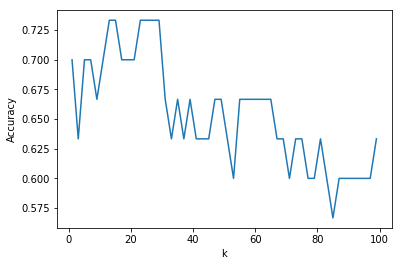

In [10]:
#Accuracy list will have some accuracy at 0th index for k =1, at 1st index for k =2 and at nth index for k = n+1
print(max(accuracy),z[accuracy.index(max(accuracy))]) #printing maximum accuracy and first value of kfor which it occurs
#PLOTTING ACCURACY VS. K graph for analysis of performance of KNN on breast cancer classification problem
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.plot(z,accuracy) 
#Plot functions gives a continuous line over all points in z (list of x coordinate) and accuracy (list of y coordinate)
plt.show() #shows the plot